# Honey Production

Honeybees are in a precarious state right now, over the years the honey bee population has been on a decline. 
In this project which has been provided by Code Academy we will investigate the decline and how the trends of the past can predict the future.

## Importing Modules

In [5]:
# Importing Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

df = pd.read_csv("Honey_Data.csv")

In [18]:
# Viewing the Data
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [42]:
# Mean Production of Honey per year
honey_prod_year = df.groupby('year').mean().reset_index()

# Creating a column for the years & Reshaping into an array
X = honey_prod_year['year']
X = X.values.reshape(-1, 1)
print('X values')
print(X)

# Creating a column for total total production & Reshaping into an array
y = honey_prod_year['totalprod']
y = y.values.reshape(-1, 1)
print('\ny values')
print(y)

X values
[[1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]]

y values
[[5105093.02325581]
 [4706674.41860465]
 [5106000.        ]
 [4221545.45454545]
 [3892386.36363636]
 [4122090.90909091]
 [4456804.87804878]
 [4243146.34146341]
 [3761902.43902439]
 [3600512.19512195]
 [3974926.82926829]
 [3626700.        ]
 [4382350.        ]
 [3680025.        ]
 [3522675.        ]]


Coefficient:  [-88303.18915238]
Intercept:  [1.81208083e+08]


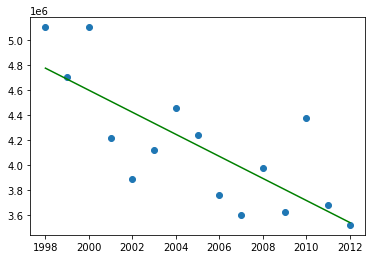

In [56]:
# Creating a Linear Regression Model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Printing the coefficient and intercept
print('Coefficient: ', regr.coef_[0])
print('Intercept: ', regr.intercept_)

# Predictions Honey Production from Model
y_predict = regr.predict(X)

# Plotting the data 
plt.scatter(X, y)
plt.plot(X, y_predict, color='g')
plt.show()


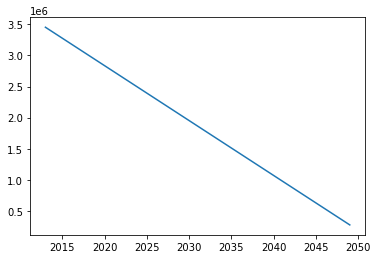

In [63]:
# Plotting into the future from 2013 to 2050 & Reshaping
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)

y_future_predict = regr.predict(X_future)
plt.plot(X_future, y_future_predict)